## ecdc data

In [1]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pylab as plt
sns.set_context('talk')
import panel as pn
import panel.widgets as pnw
pn.extension()

In [2]:
def get_data():
    df = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')
    df['dateRep'] = pd.to_datetime(df.dateRep, infer_datetime_format=True)
    df = df.sort_values(['countriesAndTerritories','dateRep'])
    df['totalcases'] = df.groupby(['countriesAndTerritories'])['cases'].apply(lambda x: x.cumsum())
    df['totaldeaths'] = df.groupby(['countriesAndTerritories'])['deaths'].apply(lambda x: x.cumsum())    
    #df['deathsper100000'] = df.deaths/df.popData2018
    df['countriesAndTerritories'] = df.countriesAndTerritories.str.replace('_',' ')    
    return df

df = get_data()

In [3]:
s= df.groupby('countriesAndTerritories').agg({'deaths':np.max,'cases':np.max}).sort_values('deaths',ascending=False).reset_index()

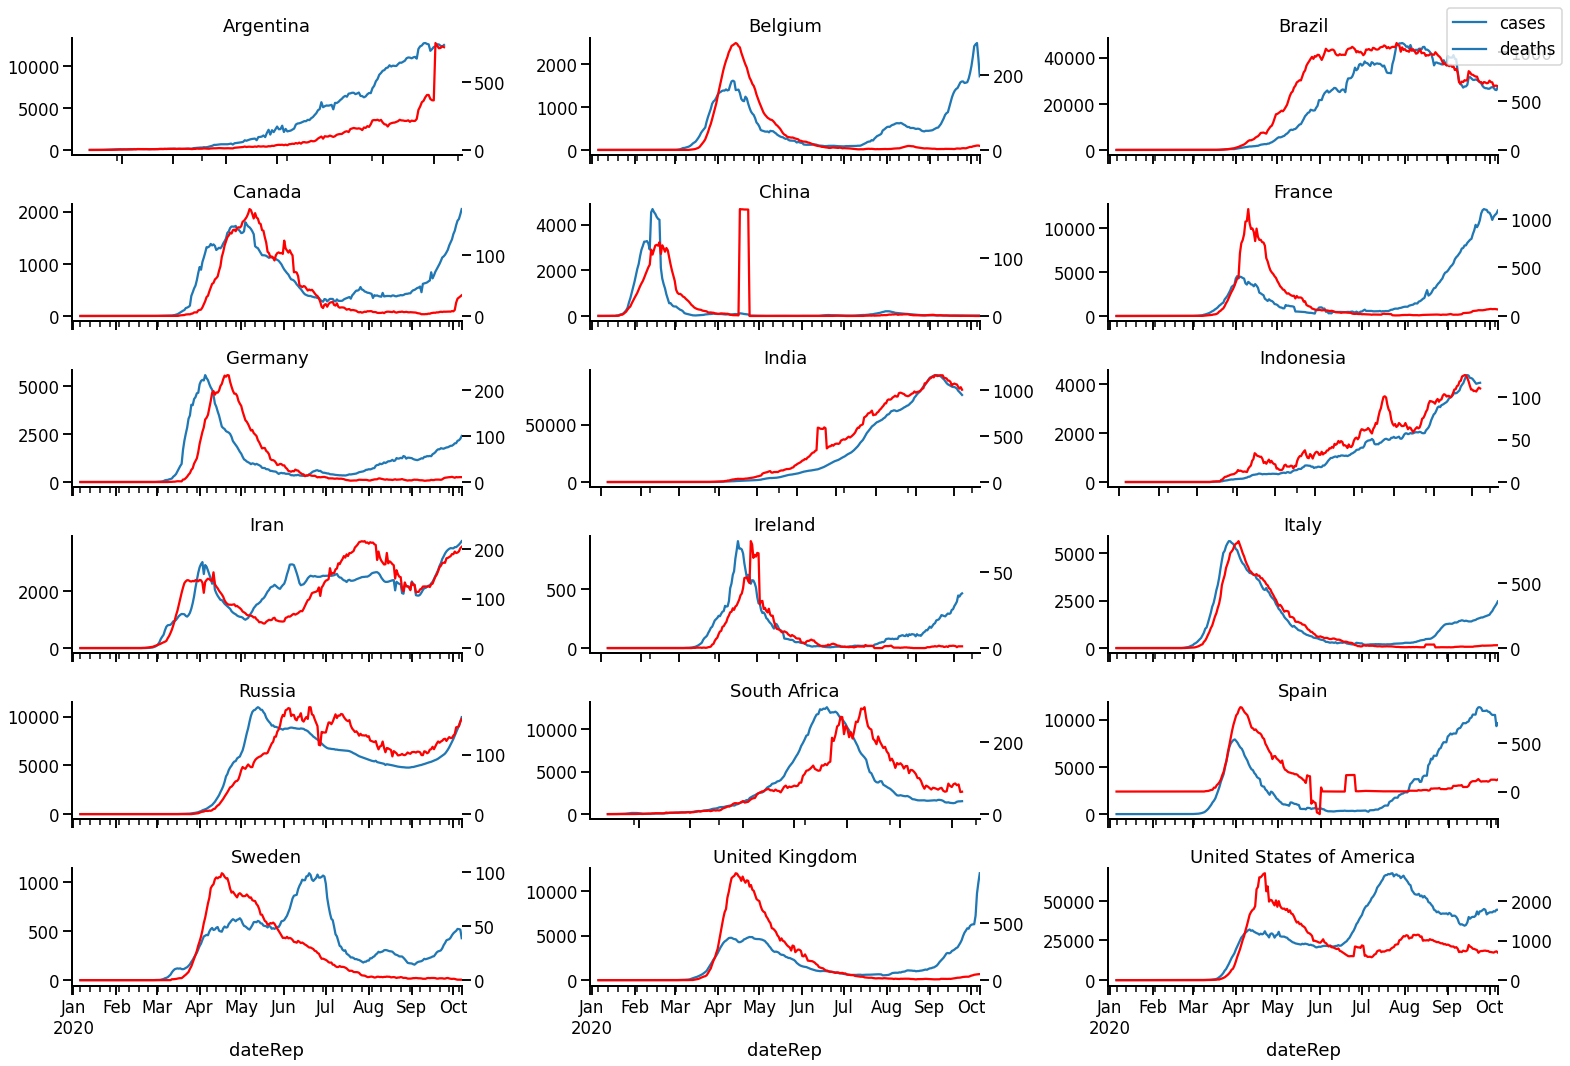

In [6]:
def plot_country(name, window=7, ax=None, legend=True):
    sub = df[df.countriesAndTerritories==name]
    x=sub.set_index('dateRep')[['cases','deaths']].rolling(window).mean()
    if ax == None:
        f,ax=plt.subplots(figsize=(15,5))
    else:
        f=ax
    l1=x.plot(y='cases',ax=ax,legend=False)
    ax1=ax.twinx()
    x.plot(y='deaths',ax=ax1,color='red',legend=False)
    if legend==True:
        ax.legend([ax.get_lines()[0],ax1.get_lines()[0]],['cases','deaths'],loc=2)
    ax.set_title(name)
    return f

def update_plot(event):
    f = plot_country(country_select.value)
    plot_pane.object = f
    
names = ['United States of America', 'France', 'India', 'Brazil', 'China',
 'United Kingdom', 'Spain', 'Italy', 'South Africa', 'Argentina',
 'Belgium', 'Iran', 'Germany', 'Ireland','Canada','Russia','Indonesia','Sweden']
names = sorted(names)
fig,ax=plt.subplots(6,3,figsize=(22,15))
axs=ax.flat
i=0
for n in names:    
    plot_country(n,ax=axs[i],legend=False)
    i+=1
fig.legend([axs[0].get_lines()[0],axs[0].get_lines()[0]],['cases','deaths'])
sns.despine()
plt.tight_layout()

## dashboard

In [5]:
names = list(df.countriesAndTerritories.unique() )
plot_pane = pn.pane.Matplotlib()
country_select = pnw.Select(name="Country", value='United States of America', height=40, options=names, width=180)
country_select.param.watch(update_plot, 'value')
app = pn.Column(country_select,plot_pane,width=300)
                     
app

Column(width=300)
    [0] Select(height=40, name='Country', options=['Afghanistan', ...], sizing_mode='fixed', value='United States o..., width=180)
    [1] Matplotlib(None)